# Logistic Regression using Gradient Ascent

The point of this workbook is to create some fake data, then solve for the true class using gradient ascent.

Gradient scent algorithm can be found in Week1 "Summary of gradient ascent for logistic regression" video.
<img src="https://github.com/yeamusic21/Coursera-Machine-Learning-Specialization-Extra-Assignments/blob/master/Classification/img/logistic_algorithm.PNG?raw=true">

The only difference I use from the above algorithm is the convergence criteria where I'm looking for a small difference between the current log-likelihood and previous log-likelihood prior to the latest coefficient update.

None of the code here is taken from the Coursera course.  This exercise is completed in order to apply the lessons learned without code assistance as well as elaborate on some aspects.

## Create Some Fake Data to Fit

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

So the idea here is to create some kind of data with a bit of structure and noise and then create a decision boundry to create our dependent variable.  The creation for X1 and X2, our independent variables don't necesarrily make a lot of sense, I'm just basically playing around to create some fake data to model.

In [2]:
#### CREATE FAKE DATA

# simulate some data
column1 = np.repeat(1, 100)
column2 = np.arange(-5,5,.1)
column3 = (column2**2)/1
column4 = (column2**3)/10
column5 = (column2**4)/100
Xplay = np.matrix([column1,column2,column3,column4,column5])
Xplay = Xplay.transpose()
# save column1 from Xplay as our first modeling variable
X1 = Xplay[:,1]
# make up some parameters
B = np.matrix(np.array([5.0345,2.0961,2.5109,1.0432,3.6657]))
B = B.transpose()
# create some fake noise
e = np.matrix(np.random.normal(0, 19, 100))
e = e.transpose()
# finally, create another fake variable using an arbitrary function with noise
X2 = Xplay*B + e

# now we're going to set some arbitrary line to pick our 1's and 0's
bound = np.arange(min(X2),max(X2),(max(X2)-min(X2))/len(X2))
Y = []
for i in range(100):
    if X2[i] > bound[i]:
        Y.append(1)
    else:
        Y.append(0)

# reformat Y
Y = np.matrix([Y])
Y = Y.transpose()

Now lets take a look at the data we created and that we're going to try and model

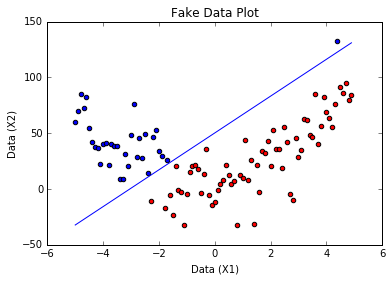

In [3]:
# plot our fake data to make sure it looks as we would expect

mask1 = Y!=1
mask0 = Y!=0

X1f = X1.flatten()
X2f = X2.flatten()

intercept = np.matrix(np.repeat(1, 100))
X = np.concatenate((intercept.transpose(),X1,X2),axis=1)

plt.scatter(X1f[mask1.ravel()], X2f[mask1.ravel()],c='red')
plt.scatter(X1f[mask0.ravel()], X2f[mask0.ravel()],c='blue')
plt.plot(X[:,1],bound[0:100])
plt.title('Fake Data Plot')
plt.xlabel("Data (X1)")
plt.ylabel("Data (X2)")
plt.show()

### Code Gradient Ascent Algorithm and Train

In [4]:
# imports
import time

The estimated Coefficients are:
[[-1.21620645]
 [-0.93264344]
 [ 0.02866646]]


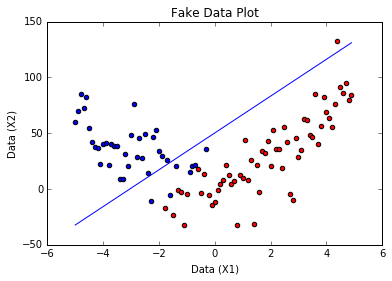

total iterations to convergence:
13874
total minutes to convergence:
0.0519333322843


In [5]:
#### SOLVE FOR COEFFICIENTS USING GRADIENT DESCENT & LEAST SQUARES

# start the clock
t0 = time.time()

# set N = size of dataset
N = X[:,1].size
N = float(N)

# initialize coefficients 
Bhat = np.matrix(np.array([1.1,1.1,1.1]))
Bhat = Bhat.transpose()
# initialize convergence flag
convergence_flag = 0
# initalize iteration counter
iterations = 0
# Set learning Rate
learning_rate = 1e-5
# loglike history
ll_history = []

# Gradient Ascent
while (convergence_flag == 0):
    iterations += 1
    # compute log-likelihood   
    logl = np.sum(np.multiply((Y-1),(X*Bhat)) - np.log(1 + np.exp(-X*Bhat))) 
    # update coefficients:
    probability = 1 / (1 + np.exp(-X*Bhat))
    residuals = Y-probability
    for i in range(0,len(Bhat)):
        derivative = residuals.transpose()*X[:,i]
        Bhat[i,:] = Bhat[i,:] + (learning_rate)*(derivative)
    # recompute log likelihood
    logl_new = np.sum(np.multiply((Y-1),(X*Bhat)) - np.log(1 + np.exp(-X*Bhat)))
    # check for convergence
    if (abs(logl_new-logl)<0.001):
        convergence_flag = 1
    # save logl for plotting later 
    ll_history.append(logl)

# print estimated coefficients     
print "The estimated Coefficients are:"
print Bhat

# compute prediction from probability
probability = 1 / (1 + np.exp(-X*Bhat))
predicted = []
for i in range(100):
    if probability[i].item(0) > 0.5:
        predicted.append(1)
    else:
        predicted.append(0)
predicted = np.matrix([predicted])
predicted = predicted.transpose()

# compute masks for plotting
mask1 = predicted!=1
mask0 = predicted!=0

# reformat for plotting
X1f = X[:,1].flatten()
X2f = X[:,2].flatten()

# plot results
plt.scatter(X1f[mask1.ravel()], X2f[mask1.ravel()],c='red')
plt.scatter(X1f[mask0.ravel()], X2f[mask0.ravel()],c='blue')
plt.plot(X[:,1],bound[0:100])
plt.title('Fake Data Plot')
plt.xlabel("Data (X1)")
plt.ylabel("Data (X2)")
plt.show()

# print some other useful information
print "total iterations to convergence:"
print iterations

t1 = time.time()
total = t1-t0
print "total minutes to convergence:"
print total/60.0

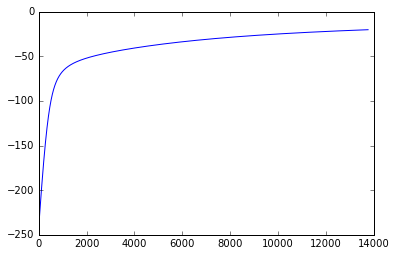

In [7]:
# plot log likelihood history
plt.plot(range(0,iterations-100),ll_history[100:])

### We did it!

So we still have the bound line in the plot to show the true decision boundry.  The blue dots are the observations we predicted as 1 and the red dots are the observations we predicted at 0.  As we can see, our model did a pretty awesome job given the noise we added!  Looks good!